# 1. 라이브러리 및 데이터 불러오기

##### Tip
csv 파일 불러오기 위해 pd.read_csv 활용
* pd.read_csv('경로', encoding=' ', header=' ', index_col=' ') 로 주로 사용
* encoding은 utf-8-sig 또는 cp949 주로 사용 ->파일 깨질 때 encoding 조절하기
* header이랑 index_col은 csv 파일에서 어디를 칼럼,인덱스로 지정할지에 따라 달라짐

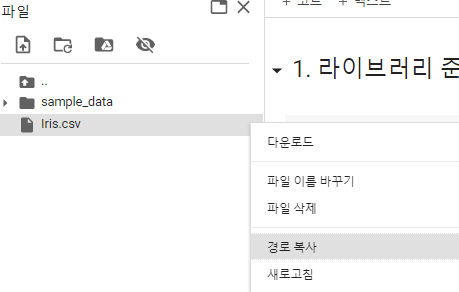

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 왼쪽에 csv 파일을 집어넣고 경로복사에서 붙여넣기
iris = pd.read_csv("/content/Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# 특이사항 있는지 확인
# 결측값, 데이터 타입 확인하기
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# 필요없는 id 값 지우기
# axis=0 은 행을 지우기, 1은 열을 지우기
# inplace는 iris에서 영구적으로 지울 것인지 여부
iris.drop('Id',axis=1,inplace=True)

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. 데이터 시각화를 통해 특성 파악하기

* sepal: 꽃받침, petal: 꽃잎
* iris 데이터는 꽃받침(길이,넓이), 꽃잎(길이, 넓이)에 따른 종 분류 데이터이다
* 종으로는 Setosa, Versicolor, Virginica가 존재한다



#### 꽃받침, 꽃잎 길이 넓이에 따른 종 분포 확인

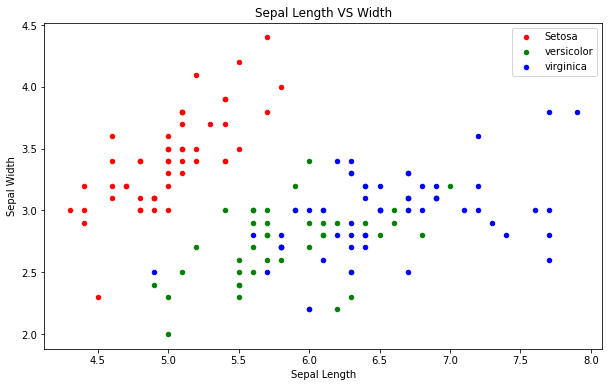

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

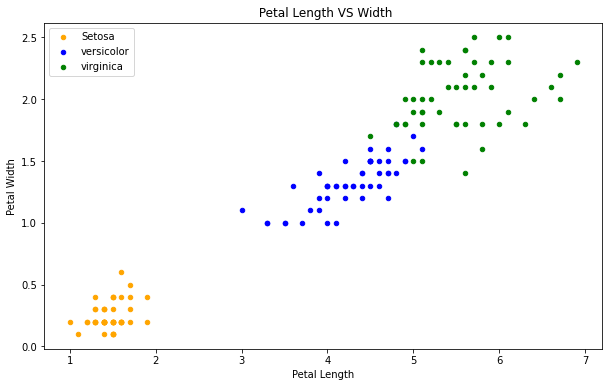

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#### 각 칼럼별 도수분포표 확인

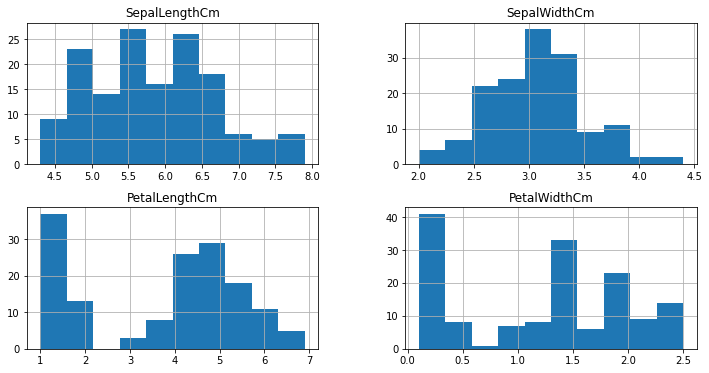

In [ ]:
iris.hist(linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### 각 칼럼별 종에 따른 박스플롯 확인

##### Tip
* 박스플롯은 데이터 분포에서 1/4 지점에서 3/4 지점까지 박스로 표시하고 2/4 지점은 박스 안에 선으로 표시
* outlier는 점으로 표시
* 데이터 분포를 파악하기 용이

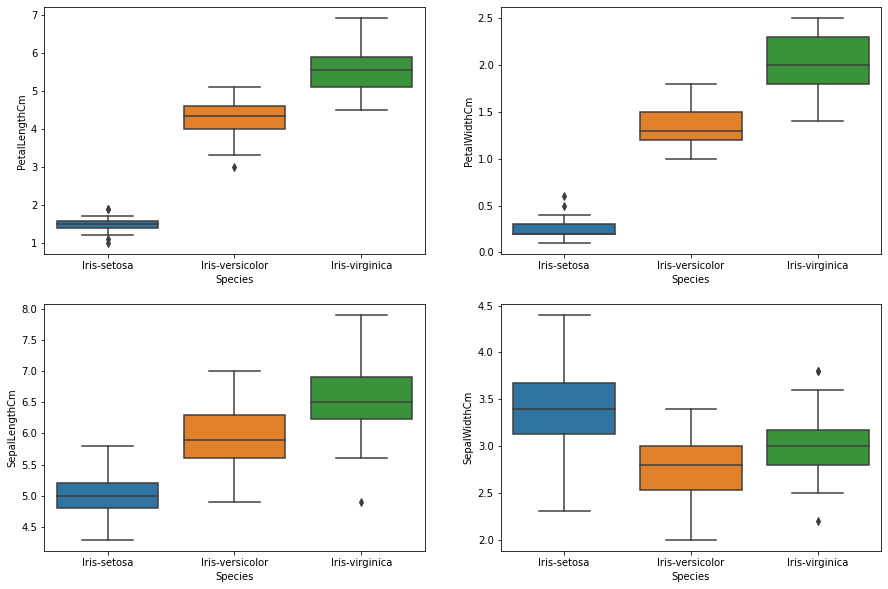

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)

# 3. 데이터 전처리
이미 데이터가 정리되어 있어 데이터를 train, test 로 나누는 작업만 진행

In [ ]:
# pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 두번 감싸주어야 함
x_data = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
x_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 학습하기 위해 0,1,2로 바꿔서 저장하기
y_data = []

# 이 때 iris['Species'] 에서 []는 한 번만 ->두번 dataframe, 한번 Series
for species in iris['Species']:
    if species == 'Iris-setosa':
        y_data.append(0)
    elif species == 'Iris-versicolor':
        y_data.append(1)
    elif species == 'Iris-virginica':
        y_data.append(2)

In [ ]:
print(y_data,sep='')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
# random_state는 랜덤값을 고정해줌
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [ ]:
X_train.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [ ]:
for i in y_train[:5]:
    print(i)

1
2
1
2
2


##### Tip
위와 같이 쌍을 이뤄서 train, test로 저장이 됨

# 4. 지도학습 모델 SVM, Decision Tree

In [ ]:
# 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

##### Tip
모델 학습 코드는 생각보다 단순하다.
1. model 생성
2. fit을 통해 모델 학습 (이때 input shape가 중요하다)
3. test 데이터를 통해 모델을 평가한다

# 4-1. SVM

In [ ]:
model = svm.SVC()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy_score = metrics.accuracy_score(prediction,y_test)
print('Support Vector Machine 정확도는', round(accuracy_score,2))

Support Vector Machine 정확도는 0.97


### SVM 시각화

4가지 feature로 시각화하면 4차원 hyperplane으로 나오므로 간단하게 아래와 같이 시각화 진행함

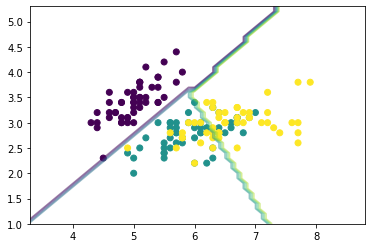

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load the Iris dataset
iris_temp = datasets.load_iris()
X = iris_temp.data[:, :2]  # Use only the first two features
y = iris_temp.target

# Train an SVM model
model = SVC(kernel='linear')
model.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.5)

# Show the plot
plt.show()

# 4-2. Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy_score = metrics.accuracy_score(prediction,y_test)
print('Decision Tree 정확도는:', round(accuracy_score,2))

Decision Tree 정확도는: 0.97


### 시각화

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
x_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


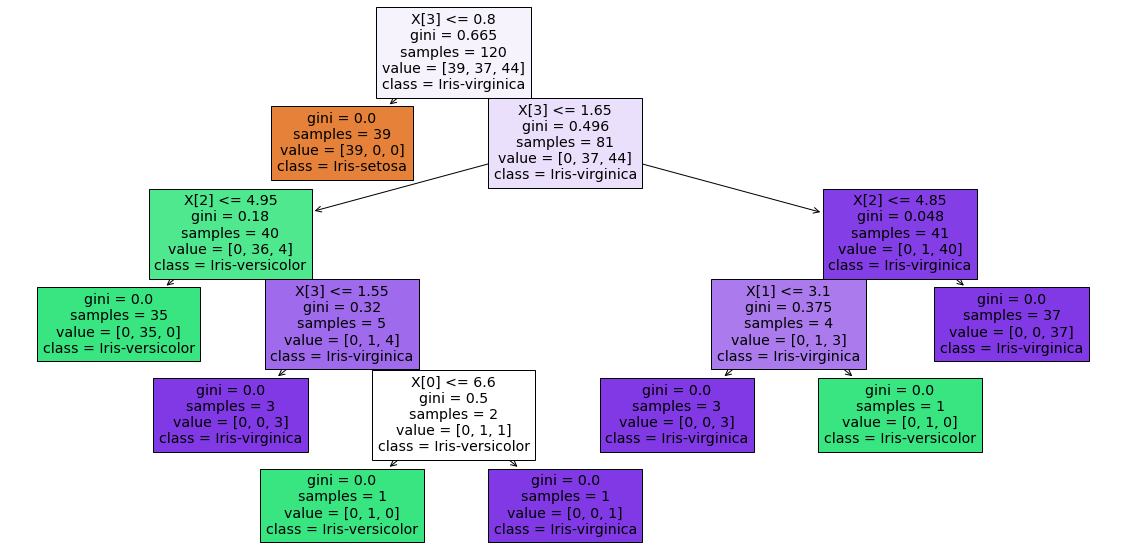

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()